In [1]:
import supereeg as se
import pandas as pd
import numpy as np
import os
import itertools
from scipy import stats
from scipy.stats import sem  
import nibabel as nib
import hypertools as hyp
import plot as plot
import matplotlib
import matplotlib.colors as mplcol
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from nilearn import plotting as ni_plt
import matplotlib.colors as colors
import seaborn as sns

In [2]:
ram_data_dir = '../../data/ram'
pyfr_data_dir = '../../data/pyfr'

In [149]:
RAM_t_df = pd.read_csv(os.path.join(ram_data_dir, 'ram_time_stability.csv'), index_col=0)
pyFR_t_df = pd.read_csv(os.path.join(pyfr_data_dir, 'pyfr_time_stability.csv'), index_col=0)

In [150]:
chunk_size=10000

In [180]:
RAM_t_df['time_idx'] = RAM_t_df.index
RAM_t_df['sample_idx'] = (RAM_t_df.index * 10000) + 10000
RAM_t_df['percent_idx'] = np.round((RAM_t_df.sample_idx / (RAM_t_df.samples/2)), decimals=2)
RAM_t_df['second_idx'] = ((RAM_t_df.index * 10000) + 10000/RAM_t_df.sample_rate)

In [181]:
RAM_t_df_long = RAM_t_df.melt(id_vars=['Subject', 'sample_rate', 'samples','time_idx', 'sample_idx', 'percent_idx', 'second_idx'], 
                              var_name='Type', value_name='Correlation')

In [182]:
RAM_t_df_long

,Subject,sample_rate,samples,time_idx,sample_idx,percent_idx,second_idx,Type,Correlation
0,R1061T_RAM_CatFR1_0,250,773040,0,10000,0.03,40.0,rand,0.998696
1,R1061T_RAM_CatFR1_0,250,773040,1,20000,0.05,10040.0,rand,0.999404
2,R1061T_RAM_CatFR1_0,250,773040,2,30000,0.08,20040.0,rand,0.999605
3,R1061T_RAM_CatFR1_0,250,773040,3,40000,0.10,30040.0,rand,0.999709
4,R1061T_RAM_CatFR1_0,250,773040,4,50000,0.13,40040.0,rand,0.999741
5,R1061T_RAM_CatFR1_0,250,773040,5,60000,0.16,50040.0,rand,0.999783
6,R1061T_RAM_CatFR1_0,250,773040,6,70000,0.18,60040.0,rand,0.999813
7,R1061T_RAM_CatFR1_0,250,773040,7,80000,0.21,70040.0,rand,0.999825
8,R1061T_RAM_CatFR1_0,250,773040,8,90000,0.23,80040.0,rand,0.999834
9,R1061T_RAM_CatFR1_0,250,773040,9,100000,0.26,90040.0,rand,0.999849


In [183]:
try_group = RAM_t_df_long.groupby("percent_idx").mean() 
# mean_PlyCount = sliding_mean(chess_data.groupby("Year").PlyCount.mean().values,  
#                              window=10)  
# sem_PlyCount = sliding_mean(chess_data.groupby("Year").PlyCount.apply(sem).mul(1.96).values,  
#                             window=10)  

In [184]:
try_group

,sample_rate,samples,time_idx,sample_idx,second_idx,Correlation
percent_idx,,,,,,
0.00,250.0,5.959750e+06,0.000000,1.000000e+04,4.000000e+01,0.976220
0.01,250.0,2.665393e+06,0.326923,1.326923e+04,3.309231e+03,0.859289
0.02,250.0,2.432563e+06,1.423077,2.423077e+04,1.427077e+04,0.878329
0.03,250.0,2.280552e+06,2.377049,3.377049e+04,2.381049e+04,0.888944
0.04,250.0,2.402873e+06,3.800000,4.800000e+04,3.804000e+04,0.900571
0.05,250.0,2.349345e+06,4.833333,5.833333e+04,4.837333e+04,0.905046
0.06,250.0,2.395961e+06,6.137931,7.137931e+04,6.141931e+04,0.890145
0.07,250.0,2.375404e+06,7.298246,8.298246e+04,7.302246e+04,0.898314
0.08,250.0,2.259599e+06,8.017241,9.017241e+04,8.021241e+04,0.922374


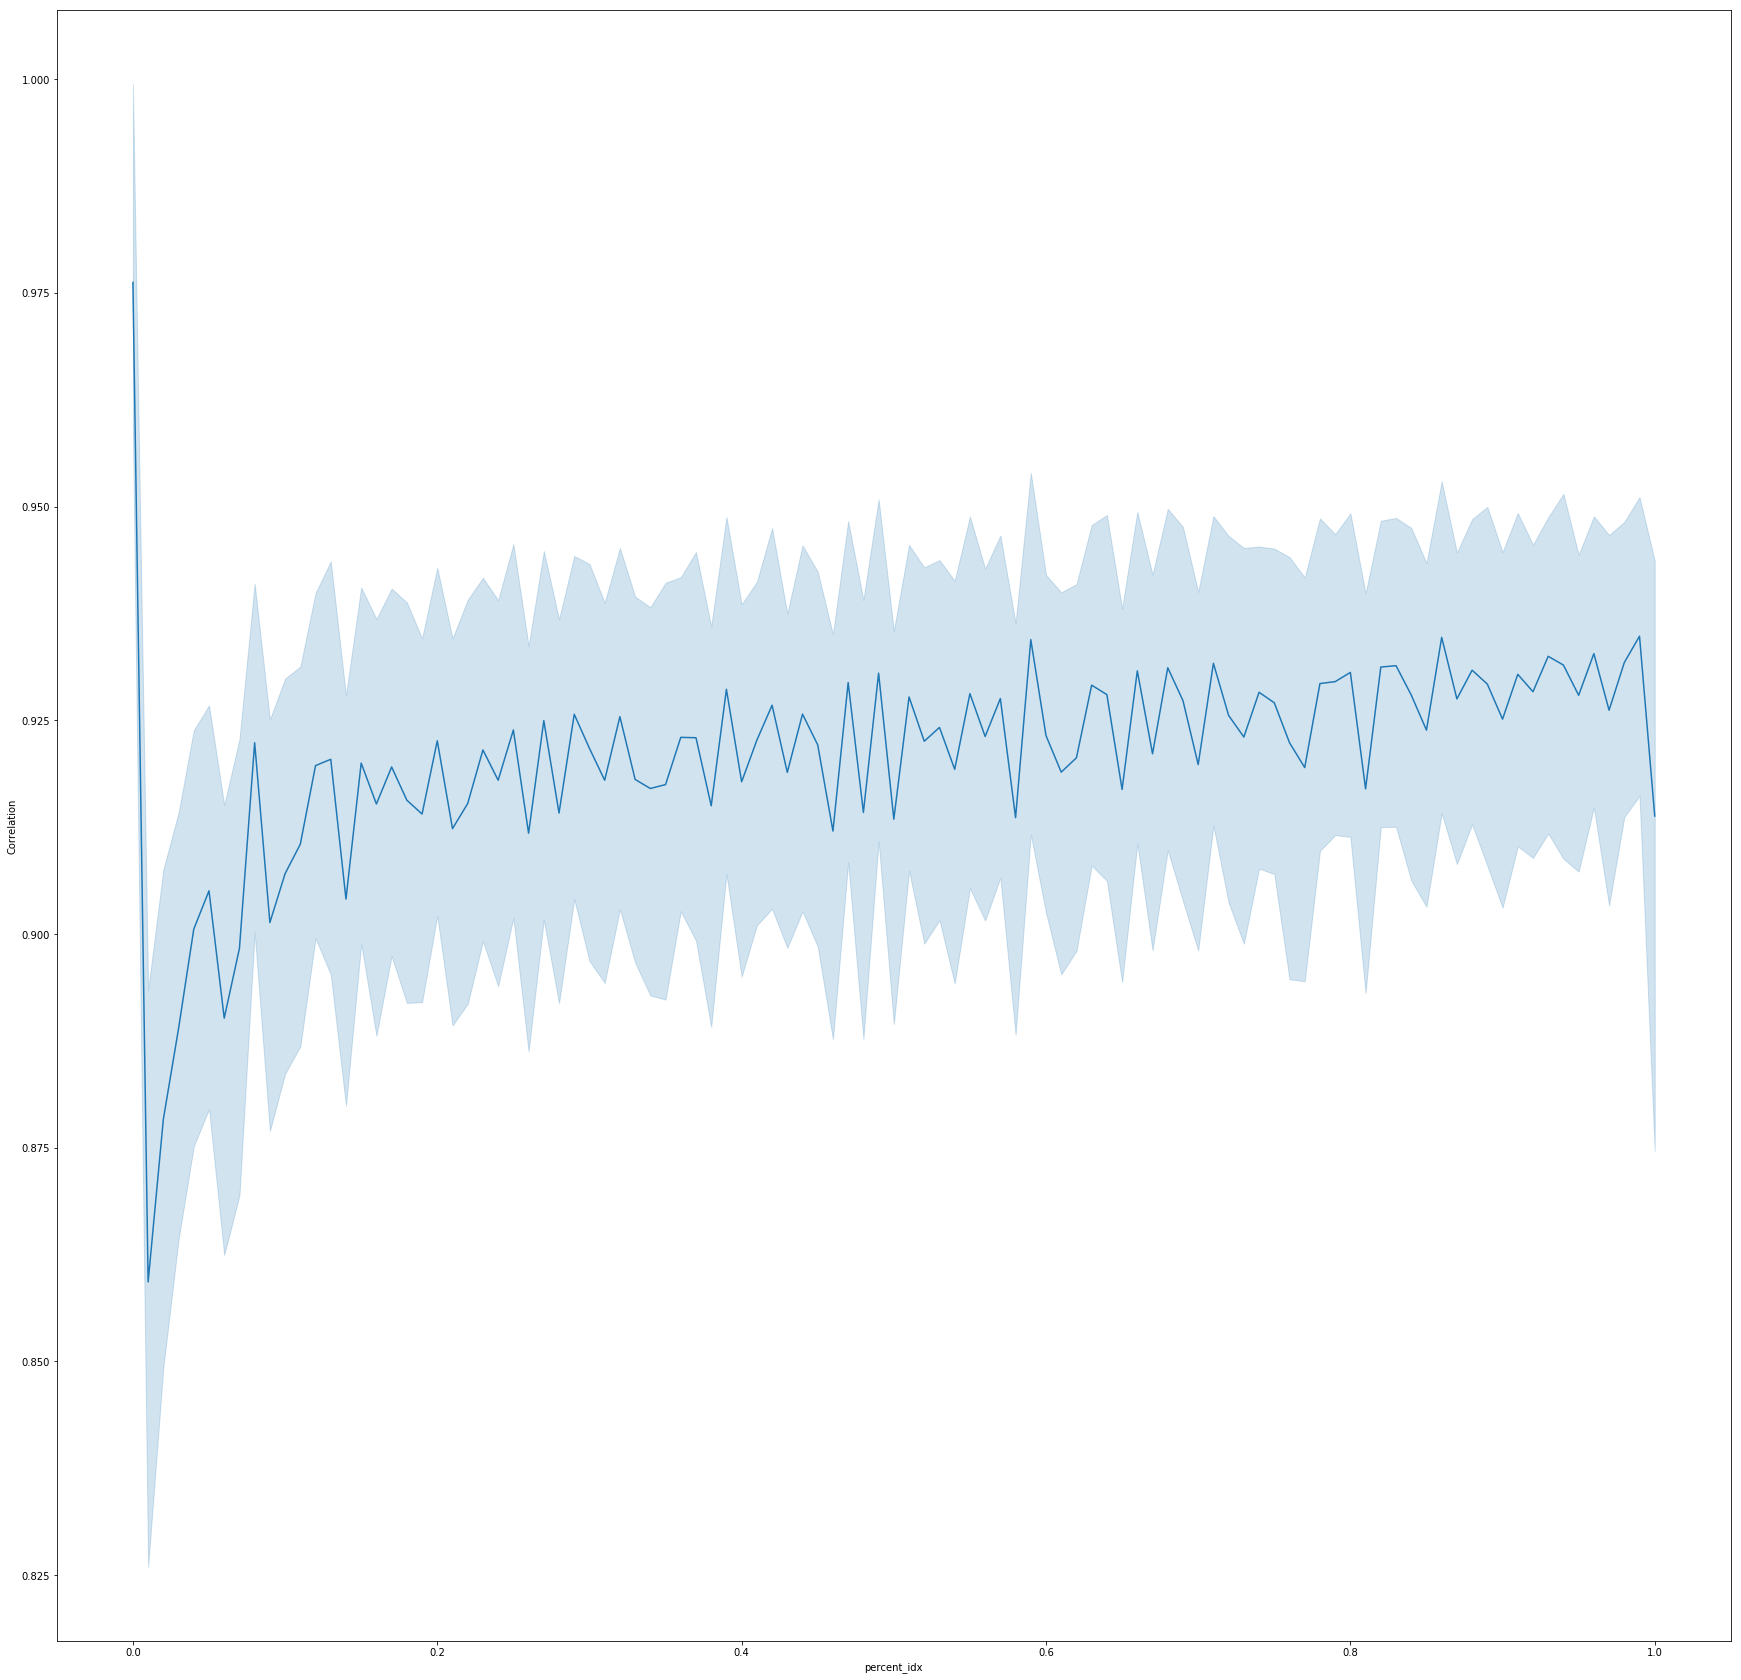

In [185]:
fig, ax = plt.subplots(figsize=[30,30])
ax = sns.lineplot(x="percent_idx", y="Correlation", data=RAM_t_df_long)

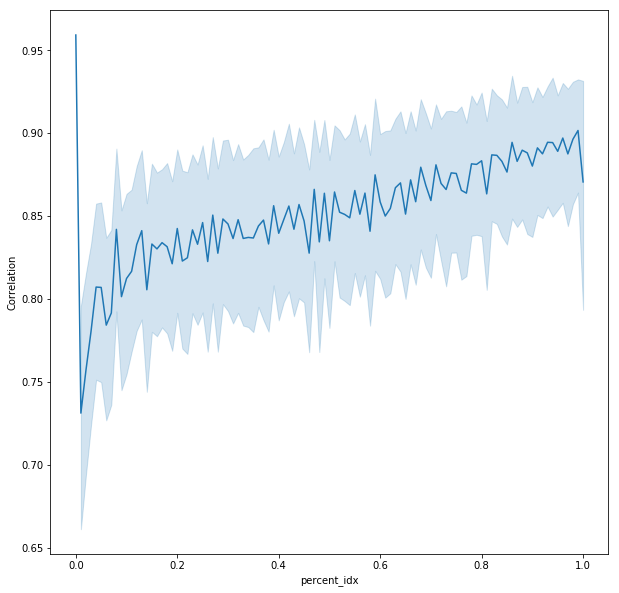

In [186]:
fig, ax = plt.subplots(figsize=[10,10])
ax = sns.lineplot(x="percent_idx", y="Correlation",
                   sort=True,data=RAM_t_df_long[RAM_t_df_long['Type']=='apart'])

In [174]:
RAM_t_df_long[RAM_t_df_long['Type']=='close']

,Subject,sample_rate,samples,time_idx,sample_idx,percent_idx,second_idx,Type,Correlation
11228,R1061T_RAM_CatFR1_0,250,773040,0,10000,0.025872,40.0,close,0.721277
11229,R1061T_RAM_CatFR1_0,250,773040,1,20000,0.051744,10040.0,close,0.758826
11230,R1061T_RAM_CatFR1_0,250,773040,2,30000,0.077616,20040.0,close,0.798628
11231,R1061T_RAM_CatFR1_0,250,773040,3,40000,0.103488,30040.0,close,0.823947
11232,R1061T_RAM_CatFR1_0,250,773040,4,50000,0.129359,40040.0,close,0.851548
11233,R1061T_RAM_CatFR1_0,250,773040,5,60000,0.155231,50040.0,close,0.856315
11234,R1061T_RAM_CatFR1_0,250,773040,6,70000,0.181103,60040.0,close,0.872239
11235,R1061T_RAM_CatFR1_0,250,773040,7,80000,0.206975,70040.0,close,0.874293
11236,R1061T_RAM_CatFR1_0,250,773040,8,90000,0.232847,80040.0,close,0.898368
11237,R1061T_RAM_CatFR1_0,250,773040,9,100000,0.258719,90040.0,close,0.911688


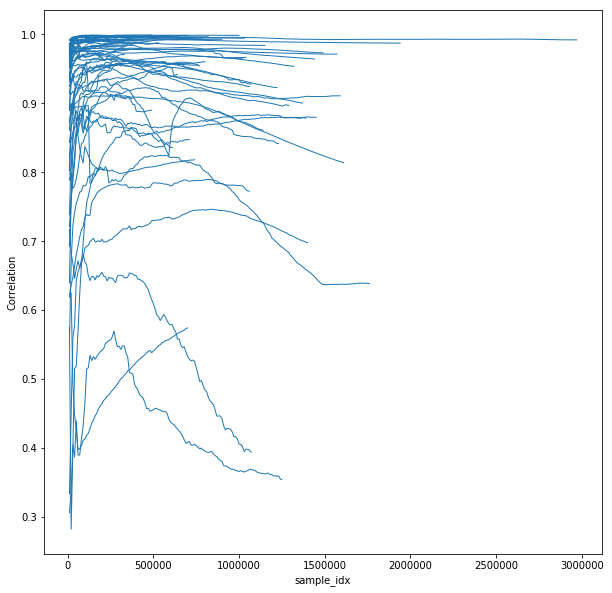

In [196]:
fig, ax = plt.subplots(figsize=[10,10])
ax = sns.lineplot(x="sample_idx", y="Correlation",
                  units="Subject", estimator=None, lw=1,data=RAM_t_df_long[RAM_t_df_long['Type']=='close'])

[(0.7, 1.01)]

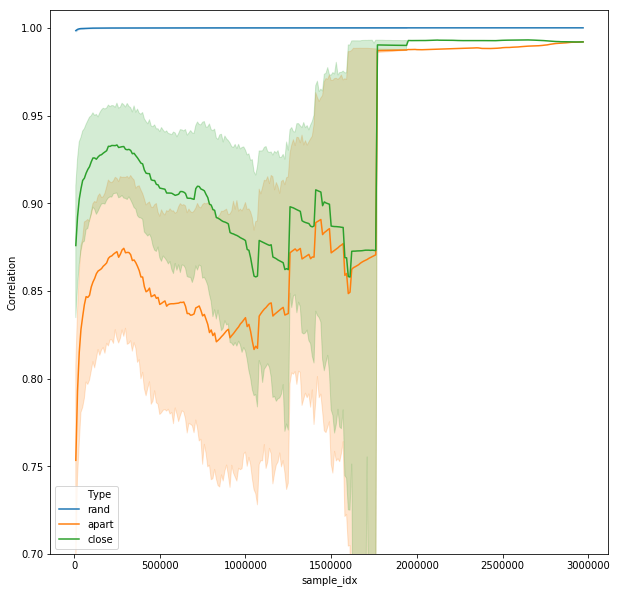

In [201]:
fig, ax = plt.subplots(figsize=[10,10])
ax = sns.lineplot(x="sample_idx", y="Correlation",
                  hue="Type",data=RAM_t_df_long)
ax.set(ylim=(.7, 1.01))
#ax.set(xlim=(.01, 1))

[(0.5, 1.01)]

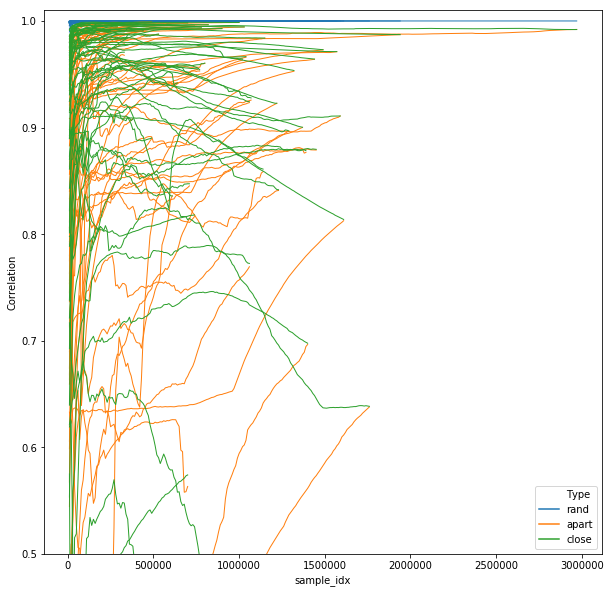

In [200]:
fig, ax = plt.subplots(figsize=[10,10])
ax = sns.lineplot(x="sample_idx", y="Correlation",
                  hue="Type",units="Subject", estimator=None, lw=1,data=RAM_t_df_long)
ax.set(ylim=(.5, 1.01))
#ax.set(xlim=(.01, 1))

[(0.5, 1.01)]

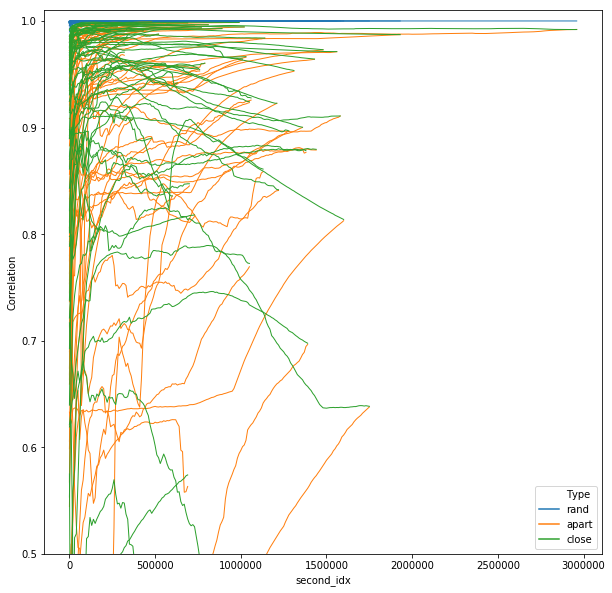

In [202]:
fig, ax = plt.subplots(figsize=[10,10])
ax = sns.lineplot(x="second_idx", y="Correlation",
                  hue="Type",units="Subject", estimator=None, lw=1,data=RAM_t_df_long)
ax.set(ylim=(.5, 1.01))
#ax.set(xlim=(.01, 1))

[(0.01, 1)]

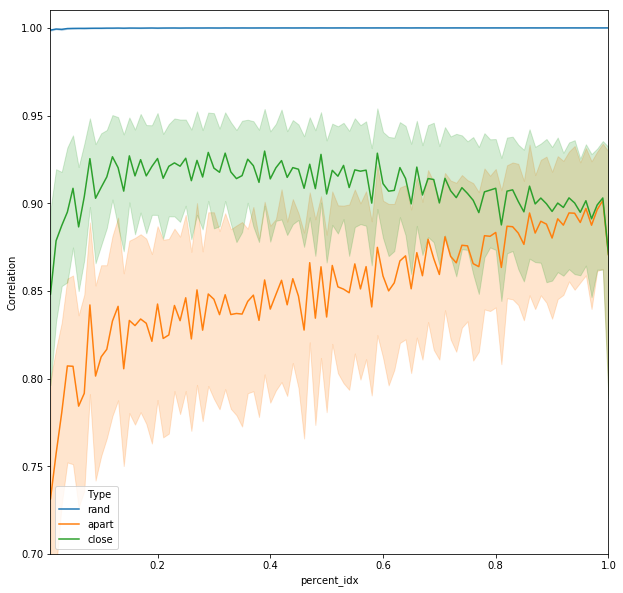

In [195]:
fig, ax = plt.subplots(figsize=[10,10])
ax = sns.lineplot(x="percent_idx", y="Correlation",
                  hue="Type",data=RAM_t_df_long)
ax.set(ylim=(.7, 1.01))
ax.set(xlim=(.01, 1))

[(0.7, 1)]

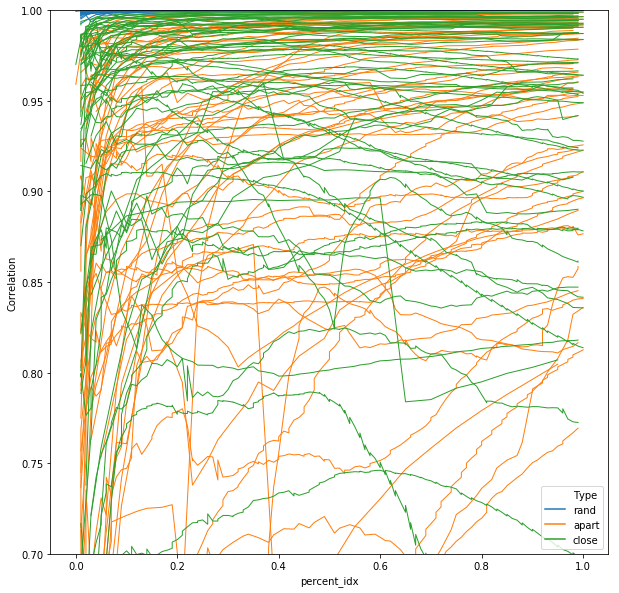

In [191]:
fig, ax = plt.subplots(figsize=[10,10])
ax = sns.lineplot(x="percent_idx", y="Correlation",
                  hue="Type", units="Subject", estimator=None, lw=1,data=RAM_t_df_long)
ax.set(ylim=(.7, 1))


In [141]:
close_parse = RAM_t_df_long[RAM_t_df_long['Type']=='close']

In [146]:
close_parse.groupby(['Subject', 'time_idx']).mean()

sample_rate  samples  sample_idx  percent_idx  \
Subject             time_idx                                                  
R1032D_RAM_CatFR1_0 0                 250   945000       10000     0.021164   
                    1                 250   945000       20000     0.042328   
                    2                 250   945000       30000     0.063492   
                    3                 250   945000       40000     0.084656   
                    4                 250   945000       50000     0.105820   
                    5                 250   945000       60000     0.126984   
                    6                 250   945000       70000     0.148148   
                    7                 250   945000       80000     0.169312   
                    8                 250   945000       90000     0.190476   
                    9                 250   945000      100000     0.211640   
                    10                250   945000      110000     0.232804   
                    11                250   945000      120000     0.253968   
                    12                250   945000      130000     0.275132   
                    13                250   945000      140000     0.296296   
                    14                250   945000      150000     0.317460   
                    15                250   945000      160000     0.338624   
                    16                250   945000      170000     0.359788   
                    17                250   945000      180000     0.380952   
                    18                250   945000      190000     0.402116   
                    19                250   945000      200000     0.423280   
                    20                250   945000      210000     0.444444   
                    21                250   945000      220000     0.465608   
                    22                250   945000      230000     0.486772   
                    23                250   945000      240000     0.507937   
                    24                250   945000      250000     0.529101   
                    25                250   945000      260000     0.550265   
                    26                250   945000      270000     0.571429   
                    27                250   945000      280000     0.592593   
                    28                250   945000      290000     0.613757   
                    29                250   945000      300000     0.634921   
...                                   ...      ...         ...          ...   
R1337E_RAM_FR1_0    73                250  2078757      740000     0.711964   
                    74                250  2078757      750000     0.721585   
                    75                250  2078757      760000     0.731206   
                    76                250  2078757      770000     0.740827   
                    77                250  2078757      780000     0.750448   
                    78                250  2078757      790000     0.760070   
                    79                250  2078757      800000     0.769691   
                    80                250  2078757      810000     0.779312   
                    81                250  2078757      820000     0.788933   
                    82                250  2078757      830000     0.798554   
                    83                250  2078757      840000     0.808175   
                    84                250  2078757      850000     0.817796   
                    85                250  2078757      860000     0.827418   
                    86                250  2078757      870000     0.837039   
                    87                250  2078757      880000     0.846660   
                    88                250  2078757      890000     0.856281   
                    89                250  2078757      900000     0.865902   
                    90                250  2078757      910000     0.875523   
 

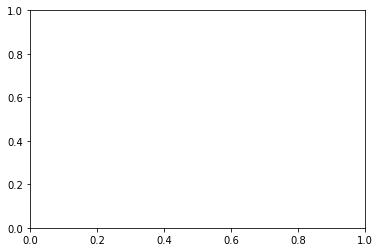

<Figure size 7200x7200 with 0 Axes>

In [72]:
# Nsteps length arrays empirical means and standard deviations of both
# populations over time
mu1 = RAM_t_df_long[RAM_t_df_long['Type']=='close'].mean(axis=1)
sigma1 = X1.std(axis=1)
mu2 = X2.mean(axis=1)
sigma2 = X2.std(axis=1)

# plot it!
fig, ax = plt.subplots(1)
ax.plot(t, mu1, lw=2, label='mean population 1', color='blue')
ax.plot(t, mu2, lw=2, label='mean population 2', color='yellow')
ax.fill_between(t, mu1+sigma1, mu1-sigma1, facecolor='blue', alpha=0.5)
ax.fill_between(t, mu2+sigma2, mu2-sigma2, facecolor='yellow', alpha=0.5)
ax.set_title(r'random walkers empirical $\mu$ and $\pm \sigma$ interval')
ax.legend(loc='upper left')
ax.set_xlabel('num steps')
ax.set_ylabel('position')
ax.grid()


In [ ]:

def numfmt(x, pos):
    s = '{}'.format(np.round((x / (100 / percent_increase) + (percent_increase / 100)), 2))
    return s


yfmt = tkr.FuncFormatter(numfmt)  # create your custom formatter function

fig, ax = plt.subplots()
#fig.gca().xaxis.set_major_formatter(yfmt)
ax.plot(corrs_close, 'k', label='Close')
ax.plot(corrs_apart, 'r', label='Apart')
ax.plot(corrs_rand, 'g', label='Random')
leg = ax.legend()
plt.ylabel('Correlation of matrices')
plt.xlabel('% Time')

plt.show()

In [8]:
# RAM_p_df = np.load(os.path.join(ram_data_dir, 'ram_patient_stability.npz'))
# pyFR_p_df = np.load(os.path.join(pyfr_data_dir, 'pyfr_patient_stability.npz'))

In [12]:
#pyFR_p_df['rand']

array([0.11777856, 0.07098411, 0.10199136, 0.13436348, 0.15075212,
       0.18511556, 0.21581228, 0.21464981, 0.26081764, 0.24984862,
       0.24360408, 0.16437537, 0.17818655, 0.18304761, 0.18266326,
       0.19118638, 0.19219629, 0.16275737, 0.1668177 , 0.15899731,
       0.1614587 , 0.16394592, 0.16139346, 0.15794364, 0.15852812,
       0.15890963, 0.15847379, 0.15954422, 0.15987668, 0.1612001 ,
       0.16239618, 0.16660069, 0.1665489 , 0.16736319])

In [3]:
RAM_p_df = np.load(os.path.join(ram_data_dir, 'ram_patient_stability.npz'))
pyFR_p_df = np.load(os.path.join(pyfr_data_dir, 'pyfr_patient_stability.npz'))

In [4]:
pyFR_p_df['rand'].shape

(100, 34)

In [21]:

def compile_corrs(array_full, iteration):
    """
        Compiles correlation values - as well as other subject specific paramters - creates the compiled pandas dataframe used for figures

        Parameters
        ----------

        file_path : string
            path to npz file containing correlation values

        Returns
        ----------
        results : dataframe
            compiled dataframe with: Subject, electrode, correlation, samples, and sample rate

        """

    return pd.DataFrame({'Correlation': array_full[iteration], 'Iteration': iteration, '# Subjects': np.arange(array_full.shape[1])+1})



pyfr_corrs = pd.DataFrame()

for f in np.arange(pyFR_p_df['rand'].shape[0]):
    
    compile_temp = compile_corrs(pyFR_p_df['rand'], f)
    if pyfr_corrs.empty:
        pyfr_corrs = compile_temp
    else:
        pyfr_corrs = pyfr_corrs.append(compile_temp)
        
        
ram_corrs = pd.DataFrame()

for f in np.arange(RAM_p_df['rand'].shape[0]):
    
    compile_temp = compile_corrs(RAM_p_df['rand'], f)
    if ram_corrs.empty:
        ram_corrs = compile_temp
    else:
        ram_corrs = ram_corrs.append(compile_temp)
        

In [16]:


pyfr_corrs_rand = pd.DataFrame()

for i in np.arange(100):
    
    rand_samp = np.zeros(pyFR_p_df['rand'].shape)
    for c in np.arange(pyFR_p_df['rand'].shape[1]):

        indices = np.random.choice(pyFR_p_df['rand'].shape[0], pyFR_p_df['rand'].shape[0], replace=True)
        rand_samp[:, c] = pyFR_p_df['rand'][indices][:, c]

    pyfr_corrs = pd.DataFrame()

    for f in np.arange(rand_samp.shape[0]):

        compile_temp = compile_corrs(rand_samp, f)
        if pyfr_corrs.empty:
            pyfr_corrs = compile_temp
        else:
            pyfr_corrs = pyfr_corrs.append(compile_temp)

    n_subs = pyfr_corrs.groupby('# Subjects').sem().reset_index()['# Subjects']+1
    sems = pyfr_corrs.groupby('# Subjects').std().reset_index()['Correlation']/n_subs

    sem_corr_temp = pd.DataFrame({'Correlation': sems, 'Iteration': i, '# Subjects': np.arange(sem_corr.shape[0])+1})
    
    if pyfr_corrs_rand.empty:
        pyfr_corrs_rand = sem_corr_temp
    else:
        pyfr_corrs_rand = pyfr_corrs_rand.append(sem_corr_temp)
        

In [17]:
pyfr_corrs_rand

,Correlation,Iteration,# Subjects
0,0.021481,0,1
1,0.017713,0,2
2,0.012274,0,3
3,0.010236,0,4
4,0.007153,0,5
5,0.007345,0,6
6,0.005111,0,7
7,0.003794,0,8
8,0.004399,0,9
9,0.003211,0,10


In [24]:
n_subs = pyfr_corrs.groupby('# Subjects').sem().reset_index()['# Subjects']+1

In [25]:
sems = pyfr_corrs.groupby('# Subjects').std().reset_index()['Correlation']/n_subs

In [26]:
sem_data = pd.DataFrame({'SEM': sems, '# Subjects': np.arange(len(sems))+1})

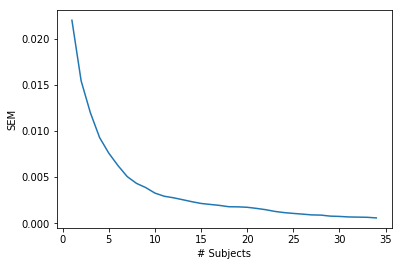

In [27]:

ax = sns.lineplot(x="# Subjects",y="SEM", data=sem_data)
#ax.set(xlim=(0, 34))

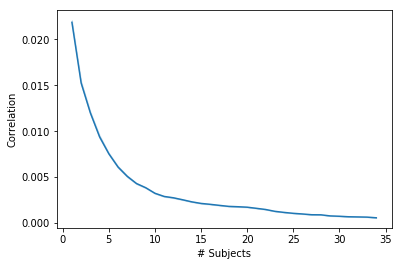

In [20]:

ax = sns.lineplot(x="# Subjects",y="Correlation", data=pyfr_corrs_rand)
# ax.set(xlim=(0, 2))
# ax.set(ylim=(.015, .02))


[(0.015, 0.02)]

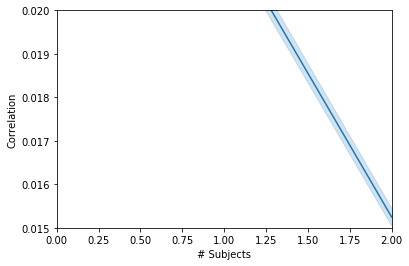

In [19]:

ax = sns.lineplot(x="# Subjects",y="Correlation", data=pyfr_corrs_rand)
ax.set(xlim=(0, 2))
ax.set(ylim=(.015, .02))



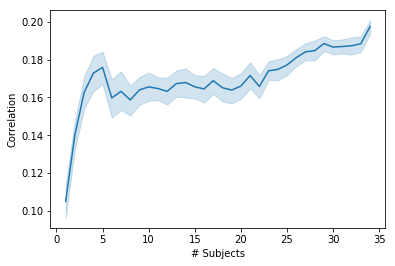

In [15]:
ax = sns.lineplot(x="# Subjects", y="Correlation", data=pyfr_corrs)

In [276]:
n_subs = ram_corrs.groupby('# Subjects').std().reset_index()['# Subjects']+1
sems_ram = ram_corrs.groupby('# Subjects').std().reset_index()['Correlation']/n_subs
sem_data = pd.DataFrame({'SEM': sems_ram, '# Subjects': n_subs})

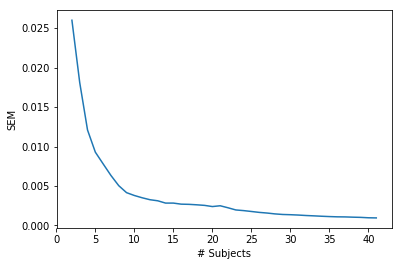

In [277]:

ax = sns.lineplot(x="# Subjects",y="SEM", data=sem_data)

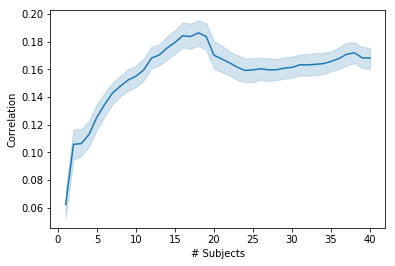

In [278]:
ax = sns.lineplot(x="# Subjects", y="Correlation", data=ram_corrs)

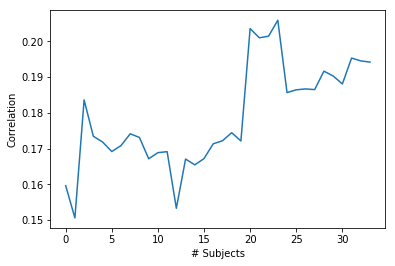

In [161]:
ax = sns.lineplot(x="# Subjects", y="Correlation", data=all_corrs[all_corrs["Iteration"]==1])

In [134]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cbook as cbook

In [138]:
X1.shape

(100, 250)

In [139]:
mu1 = X1.mean(axis=1)

In [140]:
mu1

array([0.00198576, 0.00313595, 0.00474455, 0.00664829, 0.00876286,
       0.01115769, 0.01296955, 0.01453956, 0.01610133, 0.01779331,
       0.01953384, 0.02190485, 0.02442322, 0.02554853, 0.02617681,
       0.02787768, 0.03125096, 0.03417945, 0.03493343, 0.03698684,
       0.03898746, 0.04048397, 0.0430311 , 0.04472864, 0.04618107,
       0.04866257, 0.0506348 , 0.0534217 , 0.05554209, 0.05701767,
       0.05813894, 0.06045827, 0.06208295, 0.06383666, 0.06546946,
       0.06711029, 0.06990981, 0.07215221, 0.07388288, 0.0769654 ,
       0.07831914, 0.08035398, 0.08232112, 0.08479757, 0.08667619,
       0.08779549, 0.08921046, 0.09055298, 0.09309907, 0.09591204,
       0.09742042, 0.09963102, 0.10183919, 0.10405105, 0.1061172 ,
       0.10872726, 0.11025781, 0.11323714, 0.11522421, 0.11698177,
       0.11935323, 0.12104113, 0.1231041 , 0.12471104, 0.1257525 ,
       0.12701275, 0.12879181, 0.13033577, 0.13253432, 0.13387571,
       0.13655036, 0.13879594, 0.13961273, 0.14153625, 0.14406

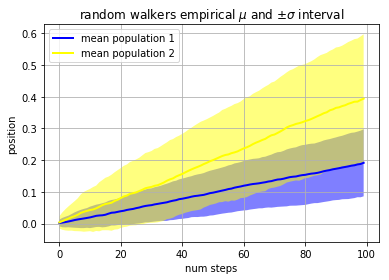

In [135]:
Nsteps, Nwalkers = 100, 250
t = np.arange(Nsteps)

# an (Nsteps x Nwalkers) array of random walk steps
S1 = 0.002 + 0.01*np.random.randn(Nsteps, Nwalkers)
S2 = 0.004 + 0.02*np.random.randn(Nsteps, Nwalkers)

# an (Nsteps x Nwalkers) array of random walker positions
X1 = S1.cumsum(axis=0)
X2 = S2.cumsum(axis=0)


# Nsteps length arrays empirical means and standard deviations of both
# populations over time
mu1 = X1.mean(axis=1)
sigma1 = X1.std(axis=1)
mu2 = X2.mean(axis=1)
sigma2 = X2.std(axis=1)

# plot it!
fig, ax = plt.subplots(1)
ax.plot(t, mu1, lw=2, label='mean population 1', color='blue')
ax.plot(t, mu2, lw=2, label='mean population 2', color='yellow')
ax.fill_between(t, mu1+sigma1, mu1-sigma1, facecolor='blue', alpha=0.5)
ax.fill_between(t, mu2+sigma2, mu2-sigma2, facecolor='yellow', alpha=0.5)
ax.set_title(r'random walkers empirical $\mu$ and $\pm \sigma$ interval')
ax.legend(loc='upper left')
ax.set_xlabel('num steps')
ax.set_ylabel('position')
ax.grid()